In [1]:
from time import time
start = time()

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.neighbors import KernelDensity
import rpy2.robjects as robjects

In [3]:
# Bright seaborn plots
sns.set_theme(palette="bright")

# load R extention to jupyter-lab cells
# (useful to combine python and R coding, but R is limited here, use R-studio instead
# if you gonna use only R)
%load_ext rpy2.ipython

### Confidence Intervals (CI) and Bootstrapping

A confidence interval is a range of values representing how confidence we are about some parameter (e.g mean, mode, median, etc) of the population based only in a sample.

Usually when working with data we only have a sample of the population rather than the whole population. However, we are able to estimate a range of values of possible values of a parameter (generally the mean o $\mu$) of the population if we have a significant sample data. Thus, the central limit theorem states that the distribution of sample means approximates a normal distribution and, as you already may know, we are able to retrieve aprox. 95% of our data covering two (to be more accurate is 1.96) standard deviation ($\sigma$) to the right and left from the mean.

Getting the means of random samples of the population and retrieving the 95% of that distribution (normal distribution because the central limit theorem) give us the confidence interval of the true mean population with a confidence of 95% based on the sample, the larger the data sample size, the better the confidence interval obtained. We can also obtain other confidence intervals, for example, a confidence interval of 99% taking aprox 3$\sigma$ from the rigth and left of the distribution of the means.

If we have multiples samples, the confidence interval can be computed getting the means of the samples and then retrieving the limit inferior of the real values of the parameter as the percentile number 0.025 and the superior with aprox 0.975, the range of values between those percentiles encompasses the 95% of all the data but, if we have only one sample, we can calculate the standard error (SE), which is the standard deviation of the means of multiples samples of the population, and multiply it for 1.96 ($\sigma$)

$$
limit\ inferior = \mu - SE * 1.96
$$

$$
limit\ superior = \mu + SE * 1.96
$$

The general representation to calculate the CI is also shown as:

$$
CI = \mu\ \pm \ z * \frac{s}{\sqrt{n}}\ \ \ \ \ \ \ \ z=confidence\ level\ value;\ s=standard\ deviation\ of\ the\ sample;\ n=sample\ size
$$

Calculating the CI as shown above assumes your data is normal distributed, which is not always the case. In this situation, we also take advantage of a powerful method called bootstrapping. 

Bootstrapping basically does a resampling of your sample calculating virtually any parameter of interest to us wich tries to describe the population parameter. This resampling is computed taking a sample of your sample of the same size but allowing repetition, for each sampled sample the parameter is calculated and, from here, several methods have been determined to calculate the CI: empirical bootstapping (here also known as basic or reverse), normal, percentile, etc.

Thus, for example, normal bootstrapping uses the definition of CI for normal data (see above) because the parameters obtained from the sampled samples follow a normal distribution, substituting the $mu$ for the $mu^*$ or mean of your sampled samples or the parameter of your interest and the $SE$ for the $SE^*$ again, of your sampled samples.

On the other hand, empirical defines the CI for the mean as:

$$
CI = (2\overline{x} - x^*_{1 - \frac{\alpha}{2}},\ 2\overline{x} - x^*_{\frac{\alpha}{2}})
$$

$$
where\ \overline{x}\ is\ the\ mean\ of\ the\ original\ data(the\ sample)
$$

$$
x^*\ is\ the\ mean\ of\ the\ sampled\ samples\ found\ in\ the\ percentiles\\
$$

$$
1\ -\ \frac{\alpha}{2}\ and\ \frac{\alpha}{2}\ (these\ are\ the\ percentiles)
$$

In [4]:
# Lets create random normal data to ilustrate the interval confidence
norm_pop = np.random.normal(10, 1, 100000)

print(f"True mean population: {norm_pop.mean()}")

True mean population: 10.002632250302632


In [5]:
# Now lets get the confidence intervals with a confidence of 95% based on only a random sample

def ShowCI95(population:"array-like", sample_size:int):
    
    '''
    Show on screen the 95% confidence interval of the mean
    
    This functions print on screen the range of values of the 95% confidence intervals based on a 
    sample of the population provided
    
    Parameters
    ----------
    
    population: array-like
        array-like representing the population where a sample of size sample_size will be taken
        
    sample_size: integer, int
        size of the sample
            
    
    Examples
    ----------
    
    >>>import numpy as np
    >>>import pandas as pd
    >>>data = np.random.normal(0,1,10000)
    >>>ShowCI95(data, 1000)
    Sample size: 1000
    Sample mean: -0.006450809541726166
    True mean population is between -0.06841125689868024 and 0.055509637815227914 with a confidence of 95%
    The sample mean has an aprox error of -0.006 +/- 0.062
    
    
    '''

    norm_sam = np.random.choice(population, sample_size)
    
    # sem() is a pandas function to get the SE
    error = pd.Series(norm_sam).sem() * 1.96
    mu = norm_sam.mean()
    
    l_inf = mu - error
    l_sup = mu + error

    print(f"Sample size: {norm_sam.shape[0]}")
    print(f"Sample mean: {norm_sam.mean()}")
    print(f"True mean population is between {l_inf} and {l_sup} with a confidence of 95%")
    print(f"The sample mean has an aprox error of {round(mu, 3)} +/- {round(error, 3)}")
    
ShowCI95(norm_pop, 5000)

Sample size: 5000
Sample mean: 10.009061317986395
True mean population is between 9.981693494610154 and 10.036429141362637 with a confidence of 95%
The sample mean has an aprox error of 10.009 +/- 0.027


In [6]:
# Lets now to try to find out the confidence interval using random sampling of the population
# Every sample will be of 5000 data points and 100 samples will be done

print(f"True population mean {norm_pop.mean()}")

means = []

for experiment in range(100):
    mu = np.random.choice(norm_pop, 5000).mean()
    means.append(mu)

means = pd.Series(means)
    
print(f"The mean of the sample means is {means.mean()}")

# If we take the percentiles covering the 95 percent of the means obtained, we are getting the confidence
# intervals with a confidence of 95%
P_025 = means.quantile(0.025)
P_975 = means.quantile(0.975)

print(f"The 95% confidence interval range from the value {P_025} to {P_975}")

True population mean 10.002632250302632
The mean of the sample means is 10.004338444400526
The 95% confidence interval range from the value 9.97797650074954 to 10.026210627552754


In [7]:
# The error increases as the sample data size decreases

for size in [10000,5000,2500,1000,500,250,125]:
    ShowCI95(norm_pop, size)
    print("")


Sample size: 10000
Sample mean: 10.002082454595334
True mean population is between 9.982603808625154 and 10.021561100565513 with a confidence of 95%
The sample mean has an aprox error of 10.002 +/- 0.019

Sample size: 5000
Sample mean: 9.971333086039623
True mean population is between 9.943358925664748 and 9.999307246414498 with a confidence of 95%
The sample mean has an aprox error of 9.971 +/- 0.028

Sample size: 2500
Sample mean: 9.988898452508822
True mean population is between 9.949832668066659 and 10.027964236950986 with a confidence of 95%
The sample mean has an aprox error of 9.989 +/- 0.039

Sample size: 1000
Sample mean: 10.012817783330739
True mean population is between 9.9496390136072 and 10.075996553054278 with a confidence of 95%
The sample mean has an aprox error of 10.013 +/- 0.063

Sample size: 500
Sample mean: 10.02489910339579
True mean population is between 9.942876918237518 and 10.10692128855406 with a confidence of 95%
The sample mean has an aprox error of 10.025 

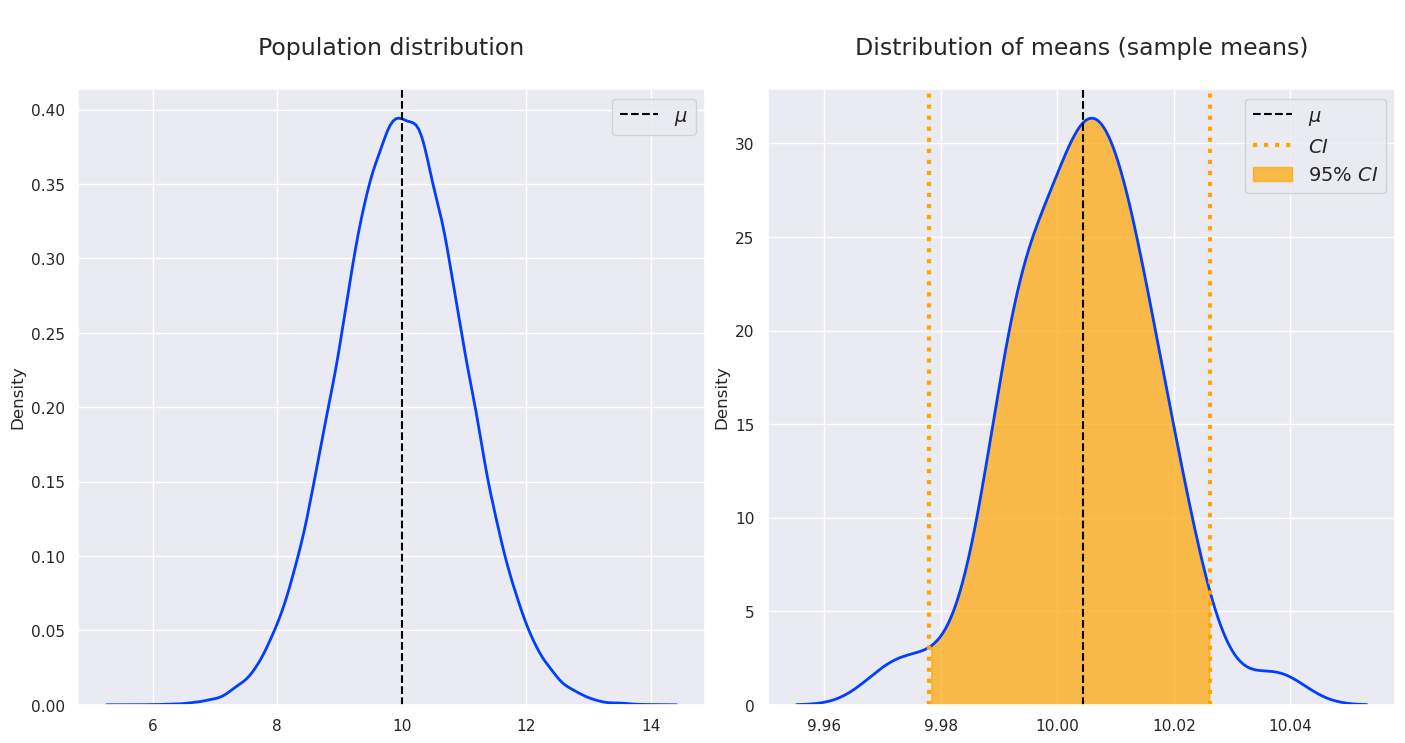

In [8]:
# The mean of the sample means is pretty much the same as the population mean but, in reality, we wouldn't know that
# Now lets see the population distribution and the distributions of the sample means

# Population plot
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(17, 8))

sns.kdeplot(norm_pop, linewidth=2, ax=ax_1)
ax_1.axvline(norm_pop.mean(), c="black", linestyle="--", label="$\mu$")
ax_1.set_title("\nPopulation distribution\n", fontdict={"size":17})
ax_1.legend(fontsize=14)

# Means plot
sns.kdeplot(means, linewidth=2, ax=ax_2)

# Mean and 95% of the data
ax_2.axvline(means.mean(), c="black", linestyle="--", label="$\mu$")
ax_2.axvline(P_025, c="orange", linestyle="dotted", linewidth=3, label="$CI$")
ax_2.axvline(P_975, c="orange", linestyle="dotted", linewidth=3)

X_fill, Y_fill = ax_2.get_lines()[0].get_data()
mask = (X_fill >= P_025) & (X_fill <= P_975)
ax_2.fill_between(X_fill[mask], Y_fill[mask], color="orange", alpha=0.7, label="$95\%\ CI$")

ax_2.set_title("\nDistribution of means (sample means)\n", fontdict={"size":17})
ax_2.legend(fontsize=14)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [9]:
# Now let's bootstrapping for the basic and percentile method to ilustrate its power in non-normal data
# We are going to create a Bootstrapping class just because, take your time to decode the python class below

class Bootstrapping:
    
    '''
    Bootstrapping resampling the sample
    
    This class does two types of bootsrapping based on the mean of the sample and return
    the low and upper confident intervals of the mean. The methods avaliable are basic
    bootstrapping, also known as Reverse Percentile Interval or Empirical bootstrapping.
    This function also computes the percentile boostrapping
    
    Parameters
    ----------
    
    data: array-like
        sample to be resampled
    
    tests: integer, int. Default 10,000
        integer indicating how many times the sample will be resample. Default 10,000
        
        
    Return
    ------
        tuple: tuple with the inferior limit and upper limit of the confidence interval
    
    
    Examples
    --------
    
    >>>from numpy.random import normal
    >>>sample = normal(0, 1, 1000)
    >>>boot = Bootstrapping(sample, tests=1000)
    >>>boot.basic()
    (-0.044194517957389545, 0.07898892888826403)
    
    '''
    
    def __init__(self, data:"array-like", tests:int=10000):
        
        self.data  = np.array(data).reshape(-1,)
        self.tests = tests
        
        self.mean = self.data.mean()
        self.std  = self.data.std()
    
    def __percentileLimits(self, means, lower, upper):
            return (np.percentile(means, lower), np.percentile(means, upper))
        
    def __bootstrap(self, sample):
            # Resampling the sample and computing the mean of the sample of the sample
            # This is basically bootstrapping
            means = []
            for _ in range(self.tests):
                mu = np.random.choice(self.data, self.data.shape[0], replace=True).mean()
                means.append(mu)
            
            return np.array(means).reshape(-1,)
        
    def basic(self, confidence=95):
        
        '''
        Get the confidence intervals based on the definition:

        CI = (low = 2X - x_{1 - a/2}, high = 2X - x_{a/2})
            where "X" is the sample/original mean, "x" is the mean found in the {1 - a/2} or 
            {a/2} percentile of the sample resampled and "a" means alpha, the value of the tail
            of the normal distribution
        
        '''
        
        means = self.__bootstrap(self.data)
        
        alpha = (100 - confidence) / 2
        lower_limit, upper_limit = self.__percentileLimits(means, alpha, 100 - alpha)
        
        return (2 * self.mean - upper_limit, 2 * self.mean - lower_limit)
    
    def percentile(self, confidence=95):
        
        '''
        Get the confidence intervals based on the definition:

        CI = (low = x_{a/2}, high = x_{1 - a/2})
            where x" is the mean found in the {1 - a/2} or {a/2} percentile of the
            sample resampled and "a" means alpha, the value of the tail of the normal
            distribution
        
        '''
        
        means = self.__bootstrap(self.data)
        alpha = (100 - confidence) / 2
        return self.__percentileLimits(means, alpha, 100 - alpha)

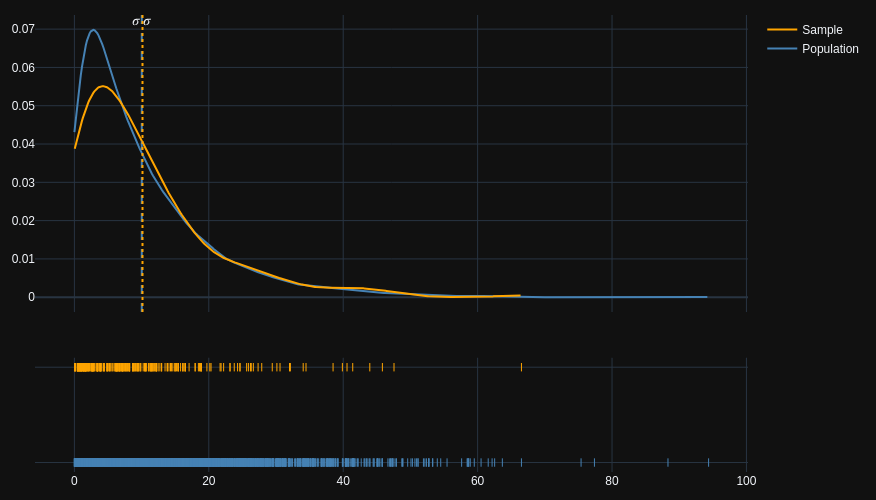

In [10]:
# Here it's our non-normal data population and sample (no samples of the sample)

exp_pop = np.random.exponential(10, 5000)
exp_sam = np.random.choice(exp_pop ,250)

# Plotting using plotly to visualize better the means (interactive but no preview on github)
fig = ff.create_distplot([exp_pop, exp_sam], ["Population","Sample"], show_hist=False,
                         curve_type='kde', colors=["steelblue","orange"])

fig.add_vline(exp_pop.mean(), annotation={"text":"$\sigma$"},
              annotation_position="top right", line_color="steelblue",
              line_dash="dash")

fig.add_vline(exp_sam.mean(), annotation={"text":"$\sigma$"}, 
              annotation_position="top left", line_color="orange",
              line_dash="dot")

fig.update_layout(
    margin=dict(l=20, r=20, t=15, b=15),
    width=860,
    height=500,
    template="plotly_dark"
)

fig.show()

In [11]:
# Now let's get the CI using our class and resampling 10000 times (default value of the class)
boots = Bootstrapping(exp_sam)

# Basic and percentile with confidence of 95%
Confidence = 95
low_b, high_b = boots.basic(confidence=Confidence)
low_p, high_p = boots.percentile(confidence=Confidence)

print(f"\nTrue population mean:{exp_pop.mean()}")
print("\nCI USING BASIC AND PERCENTILE BOOTSTRAPPING")
print("\nBasic bootstrapping:")
print(f"\tThe {Confidence}% confidence interval range from the value {low_b} to {high_b}")
print("\nPercentile bootstrapping:")
print(f"\tThe {Confidence}% confidence interval range from the value {low_p} to {high_p}")


True population mean:10.025264428401472

CI USING BASIC AND PERCENTILE BOOTSTRAPPING

Basic bootstrapping:
	The 95% confidence interval range from the value 8.813732733106374 to 11.333617998277647

Percentile bootstrapping:
	The 95% confidence interval range from the value 8.90137695391619 to 11.439340035657656


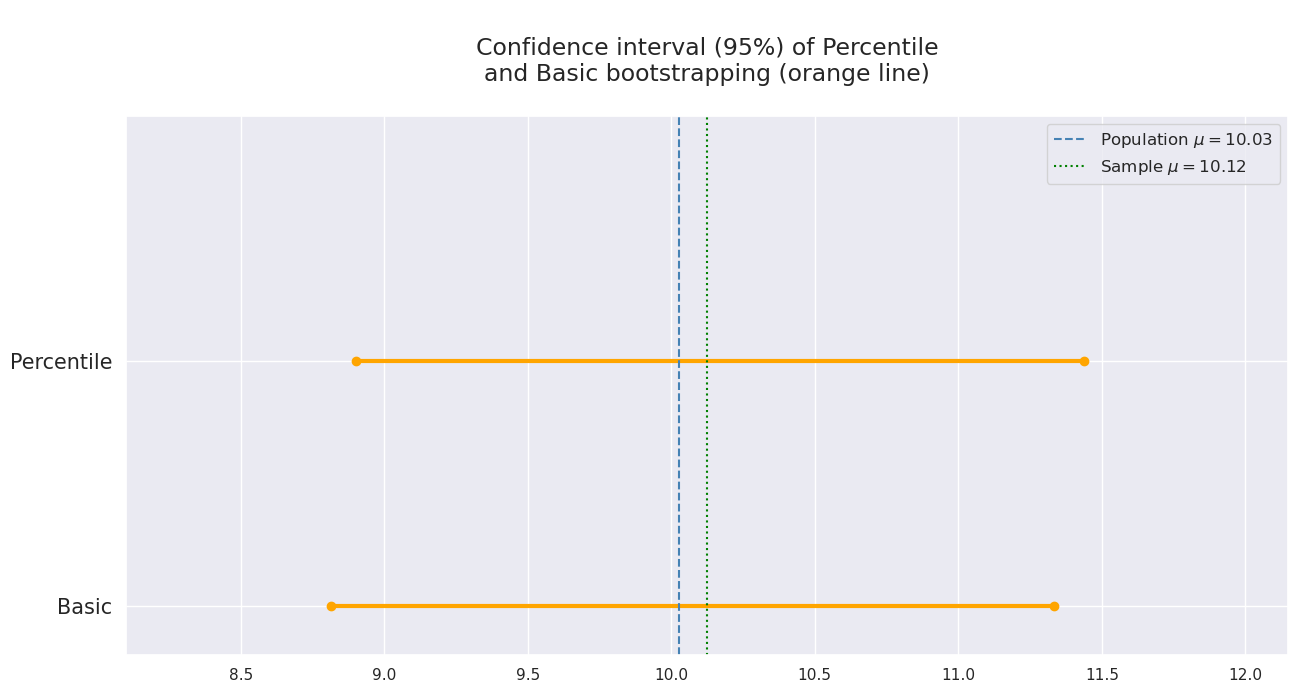

In [12]:
# Let's plot the results
data_dict = {}
data_dict['category'] = ['Basic','Percentile']
data_dict['lower'] = [low_b, low_p]
data_dict['upper'] = [high_b, high_p]
dataset = pd.DataFrame(data_dict)

plt.figure(figsize=(15,7))
y_axis = np.arange(0, dataset.shape[0] / 2, 0.5)
for lower, upper,y in zip(dataset['lower'], dataset['upper'], y_axis):
    plt.plot((lower,upper),(y,y),'o-', color="orange", linewidth=3)

plt.axvline(exp_pop.mean(), linestyle="--", c="steelblue", label=f"Population $\mu={round(exp_pop.mean(),2)}$")
plt.axvline(exp_sam.mean(), linestyle="dotted", c="green", label=f"Sample $\mu={round(exp_sam.mean(),2)}$")

plt.ylim(-0.1, 1)
plt.xlim( exp_sam.mean() - (exp_sam.mean() / 5), exp_sam.mean() + (exp_sam.mean() / 5) )
plt.yticks(y_axis, list(dataset['category']), fontsize=15)
plt.legend(fontsize=12)
plt.title("\nConfidence interval (95%) of Percentile\nand Basic bootstrapping (orange line)\n", fontdict={"size":17})
plt.show()

In [13]:
# We don't need to code our functions/classes to calcute the CI using bootstrap. scipy has already an implementation
# for basic, percentile and another one called bca (which is a litle bit more complicated to code)

boots_types = {"percentile":np.NaN, "basic":np.NaN, "bca":np.NaN}

for key in boots_types:
    b = stats.bootstrap((exp_sam,), np.mean, confidence_level=0.95, method=key)
    boots_types[key] = b.confidence_interval

boots_types

{'percentile': ConfidenceInterval(low=8.890694691998482, high=11.443050740251175),
 'basic': ConfidenceInterval(low=8.8488697925584, high=11.375715274846184),
 'bca': ConfidenceInterval(low=8.971066640834419, high=11.492624983828607)}

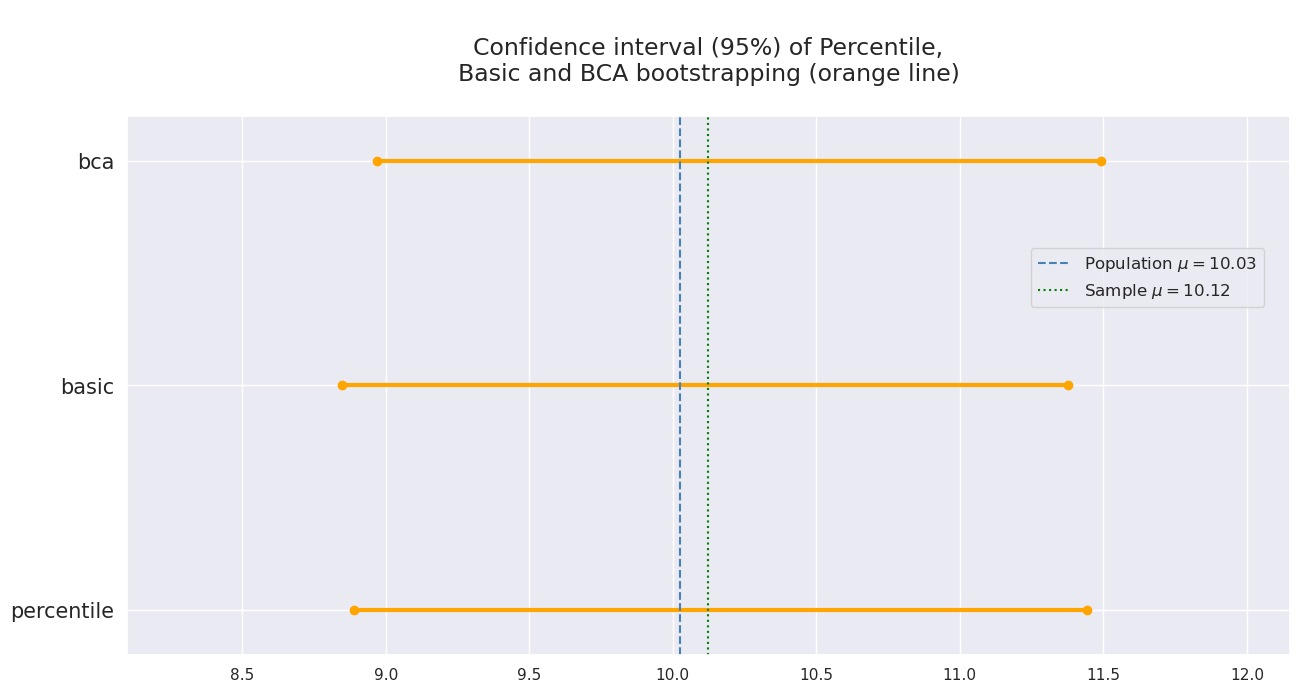

In [14]:
# Let's plot the results of scipy

b = boots_types
data_dict = {}
data_dict['category'] = ['percentile', 'basic', 'bca']
data_dict['lower'] = [b["percentile"].low, b["basic"].low, b["bca"].low]
data_dict['upper'] = [b["percentile"].high, b["basic"].high, b["bca"].high]
dataset = pd.DataFrame(data_dict)

plt.figure(figsize=(15,7))
y_axis = np.arange(0, dataset.shape[0] / 2, 0.5)
for lower, upper,y in zip(dataset['lower'], dataset['upper'], y_axis):
    plt.plot((lower,upper),(y,y),'o-', color="orange", linewidth=3)

plt.axvline(exp_pop.mean(), linestyle="--", c="steelblue", label=f"Population $\mu={round(exp_pop.mean(),2)}$")
plt.axvline(exp_sam.mean(), linestyle="dotted", c="green", label=f"Sample $\mu={round(exp_sam.mean(),2)}$")

plt.ylim(-0.1, 1.1)
plt.xlim( exp_sam.mean() - (exp_sam.mean() / 5), exp_sam.mean() + (exp_sam.mean() / 5) )
plt.yticks(y_axis, list(dataset['category']), fontsize=15)
plt.legend(loc="center right", fontsize=12, bbox_to_anchor=(0.985, 0.7))
plt.title("\nConfidence interval (95%) of Percentile,\nBasic and BCA bootstrapping (orange line)\n", fontdict={"size":17})
plt.show()

### P-value

A p-value is the probability of obtaining equal or rarer observations from your data point or observation. This translates as the area under the curve of the tails of your data distribution (see above plot).

This p-value ($p$) is used to reject or not a null hypothesis. Any hypothesis that is not null is simply denoted as an alternative. To reject or not the null, an alpha ($\alpha$) value is chosen as a cutoff to denote at what probability an observation can be considered extraordinary, this $\alpha$ value is usually chosen as 0.05, although in reality it tends to be an arbitrary value. Thus, depending on the "error" one is willing to accept, $\alpha$ can vary, for example, being stricter with values of 0.001 (accepting one "error" per 1000 observations) or 0.2 (one "error" per 5 cases). Thus, with a value of $p < \alpha$ the null hypothesis can be rejected and we would go for the alternative hypothesis, otherwise, with $p >  \alpha$, we would not have enough evidence to reject the null hypothesis.

On the other hand, how the heck are those hypotheses determined? Well, several "definitions" of what a null hypothesis is can be found such as "What is accepted by default", "Whatever is known or already defined", "What we do not want to test, or more formal "hypothesis that proposes that no statistical significance exists in a set of given observations", while the alternative is "What we are interested in knowing", but the reality is that they are somewhat ambiguous and personal criteria can certainly bias the determination of the hypothesis and end up choosing the wrong one (as may do, incluiding me). In fact, the choice of which hypothesis should be configured as the alternative or null is a much more complex process and will not be discussed in detail here. However, a more descriptive article about this can be found [somewhere else](https://towardsdatascience.com/hypothesis-testing-decoded-for-movers-and-shakers-bfc2bc34da41). The reality is that many statistical tests have already defined which is their null hypothesis and, therefore, which is the alternative.

In [15]:
# Let's get normal data and point out those "extraordinary" observations
normal = np.random.normal(10, 5, 5000)

# tails based on alpha = 0.05 o just 0.025 for each tail (right and left)
alpha_tail = 0.05 / 2
left_tail = np.quantile(normal, alpha_tail)
right_tail= np.quantile(normal, 1 - alpha_tail)

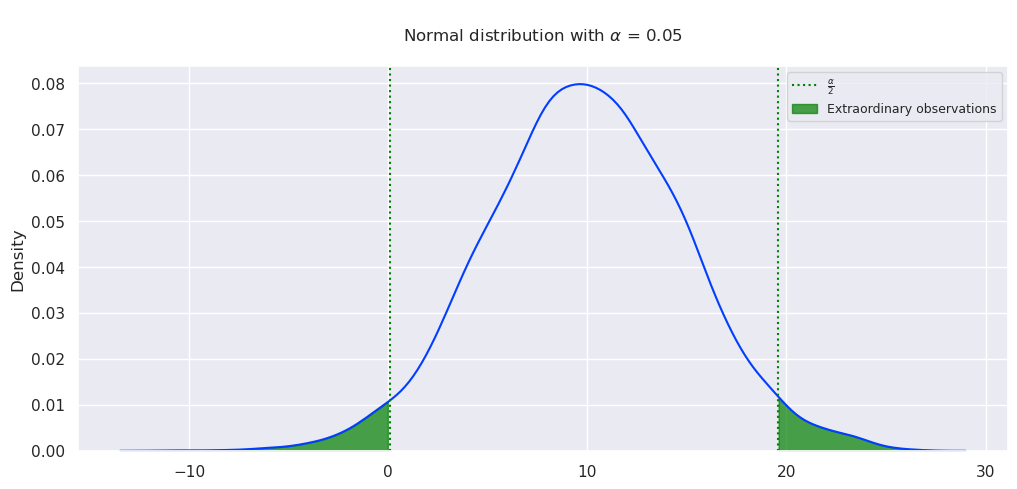

In [16]:
# Plotting distribution and tails

plt.figure(figsize=(12,5))
axis = sns.kdeplot(normal)
axis.axvline(left_tail, linestyle="dotted", color="green", label=r"$\frac{\alpha}{2}$")
axis.axvline(right_tail,linestyle="dotted", color="green")

# values equal or lower than alpa
X,Y = axis.get_lines()[0].get_data()
mask_left = (X <= left_tail)
mask_right= (X >= right_tail)

axis.fill_between(x=X[mask_left], y1=Y[mask_left], color="green", alpha=0.7, label="Extraordinary observations")
axis.fill_between(x=X[mask_right], y1=Y[mask_right], color="green", alpha=0.7)

axis.legend(fontsize=9)
plt.title(f"\nNormal distribution with $\\alpha$ = {alpha_tail * 2}\n")
plt.show()

In [17]:
# USING THE EXAMPLE ABOVE (PLOT)....
# The p_value is the probability of getting the same or even rarer observations of you data point, for example,
# the probability of getting a value of x=5 or rarer means getting a value of 5 or 4, or 3 etc. Likewise,
# It also encompass getting values of 15 or 16 or 17 etc. Because values of x greater than 15 (kind of) has the same
# probability of getting a value of 5 and we also take into account stranger observations

adjusted_curve = stats.norm(loc=normal.mean(), scale=normal.std())

# Probability of getting equal or rarer values of x=5 (cumulative density function of 5 of only one tail)
x = 5
p_value_left = adjusted_curve.cdf(x)

# The symmetric nature of normal distribution makes simple to get the probability of the right tail
p_value = p_value_left * 2

print(f"\nThe p-value of getting the same or rarer observation of our value chosen '{x}' is {p_value}\n")


The p-value of getting the same or rarer observation of our value chosen '5' is 0.31815533736165813



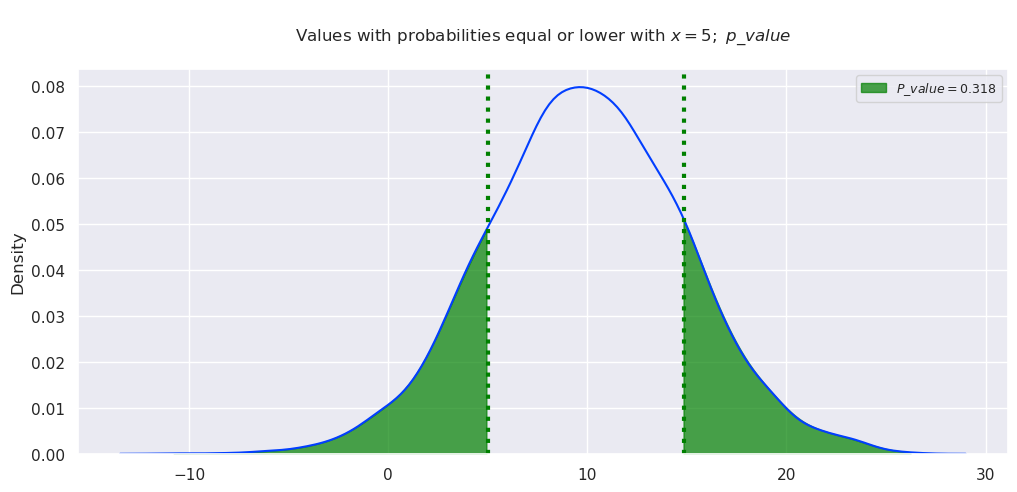

In [18]:
# As you saw above, a probability of 0.3 is not such a rare thing, It's pretty common, therefore our value of x=5
# is not special as you could think. There is even stranger observations

# Getting the exact symmetric value of x on the right tail
right_tail_value_percentile = 100 - stats.percentileofscore(normal, x)
right_tail_value = np.percentile(normal, right_tail_value_percentile)

# Estimating density of the plot because seaborn sometimes is not as good as sklearn
# This is usefull to fill under the curve the plot below
normal_copy = normal.reshape(-1,1)
samples_x_left  = np.arange(min(normal_copy), x, 0.1).reshape(-1, 1)
samples_x_right = np.arange(right_tail_value, max(normal_copy), 0.1).reshape(-1, 1)

kernel_density_object = KernelDensity().fit(normal_copy)
samples_y_left  = np.exp(kernel_density_object.score_samples(samples_x_left))
samples_y_right = np.exp(kernel_density_object.score_samples(samples_x_right))

# Plotting distribution and tails

plt.figure(figsize=(12,5))
axis = sns.kdeplot(normal_copy)
axis.axvline(x, linestyle="dotted", color="green", linewidth=3)
axis.axvline(right_tail_value, linestyle="dotted", color="green", linewidth=3)

# values equal or lower than x (in this case it was 5)
axis.fill_between(x=samples_x_left.reshape(-1,), y1=samples_y_left.reshape(-1,),
                  color="green", alpha=0.7,
                  label=f"$P\_value={round(p_value, 3)}$")
axis.fill_between(x=samples_x_right.reshape(-1,), y1=samples_y_right.reshape(-1,),
                  color="green", alpha=0.7)

axis.legend(fontsize=9)
plt.title(f"\nValues with probabilities equal or lower with $x={x};\ p\_value$\n")
plt.show()

### Parametric test

Parametric tests are those statisctic tests that make assumptions about the parameters of the population distribution (usually normally distributed) from wich the sample is drawn. In such way, We are able to see in this category some of the following test

* T-test
* Z-test
* Anova
* Ancova
* Manova
* Mancova

Every test shown above is used on different sceneries according to the data used, sample size and purpose of the research. Also, it's worth to note that every test produce a value which needs to be compared to the distribution of the repective test to get the right p-value and, therefore, reject or not the null hypotesis

#### T-test

This parametric test is used to compare the means between two groups (It determines if the means of the two groups are equal between each other).

T-test or Student's t-test is used when the standard deviation of the population is unknown and/or the sample size is lower than 30 (rule of thumb). T-test assumes the following about your data

1. The sample data have been randomly sampled from a population.
2. There is homogeneity of variance (i.e., the variability of the data in each group is similar).
3. The distribution is approximately normal.

The second point discussed above is not exactly true because there is a t-test for samples with unequal variances. In this way, there are 3 t-tests trying to answer different questions.

* T-test paired (within-subject design): A T-test paired is used If the groups come from the same population (i.e., measure before and after a group under a experimental treatment) 

* T-test of two-samples or independent t-test (between-subjects design): A two-samples T-test is used if two groups come from different populations (i.e., two species or two groups of people from different cities). Independet T-test has two elemental variants. An independent T-test for samples with equal size and variance and an independent T-test for samples with equal or unequal sample size and unequal variances (This is also called a welch's test) 

* One sample T-test: If we only have one group that is compared to a single value, we use one-sample T-test.

On the other hand, we also need to remember those tests can be applied to one-tailed and two-tailed experiments.

__T-test paired__

$$T = \frac{mean_1 - mean_2}{\frac{s(diff)}{\sqrt(n)}}$$

$$s(diff)=standard\ deviation\ of\ the\ paired\ differences\ of\ the\ samples$$

$$degree\ of\ freedom\ or\ df= n -1$$

__One sample T-test__

$$T = \frac{\overline{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

$$\overline{x}=mean\ of\ the\ sample$$
$$\mu_0 = value\ to\ compare$$
$$s = standard\ deviation$$
$$df=n-1$$

__Independent T-test or two-samples T-test__

_Equal variances_

$$T = \frac{\overline{x_1} - \overline{x_2}}{Sp \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

$$Sp=\sqrt{  \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}}$$

$$s_1; s_2 = standard\ deviation$$
$$df= n_1 + n_2 - 2$$


_Unequal size and unequal variances (also called welch's t-test)_

$$T =  \frac{\overline{x_1} - \overline{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

$$s_1;s_2 = standard\ deviation$$

$$df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{1}{n_1 - 1}(\frac{s_1^2}{n_1})^2 + \frac{1}{n_2 - 1}(\frac{s_2^2}{n_2})^2}$$

$$s_1;s_2 = standard\ deviation$$


You probably noticed something called degrees of freedom, in a nutshell, the distribution curve as the sample size decreases changes, this translates as longer and wider tails and a less high peak. Therefore, this curve of our statistic has to be refined according to the sample size, and this is what the degrees of freedom are for.

##### F-test

I mentioned earlier that in order to perform a t-test there must be homogeneity of variance. An F-test is a popular test to assay it.

F-test is usually (but not limited) to assays the variance among two variables and it's sensitive to non-normal data. The null hypotesis states equal variance for the two samples $var_1 = var_2$ and the alternative hypotesis of two-tailed is $var_1 \ne var_2$.

$$
F = \frac{\sigma_1^2}{\sigma_2^2}\ \ \ \ \ \ \ \sigma_1^2;\sigma_2^2 = variances\ of\ the\ population\ or\ the\ samples
$$

Depending if the test is set to two-tailed, right-tailed or left-tailed. The order to determine $\sigma_n^2$ vary. For intance, a two-tailed or right-tailed the larger variance between the samples is set to be the numerator, instead in a left-tailed, the smaller value of the variance becomes the numerator.

Other tests to check for homogeneity of variances usually used (sometimes even refered as "more powerfull than the F-test") are levene's test and Barlett test. Those are not going to be discussed in more detail here but It's good to know that they exist.

In [19]:
# Loading dataset
iris_df = sns.load_dataset("iris")
iris_df.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species
79            5.7          2.6           3.5          1.0  versicolor
100           6.3          3.3           6.0          2.5   virginica
39            5.1          3.4           1.5          0.2      setosa
107           7.3          2.9           6.3          1.8   virginica
30            4.8          3.1           1.6          0.2      setosa
33            5.5          4.2           1.4          0.2      setosa
121           5.6          2.8           4.9          2.0   virginica
104           6.5          3.0           5.8          2.2   virginica
32            5.2          4.1           1.5          0.1      setosa
118           7.7          2.6           6.9          2.3   virginica

In [20]:
# Filtering samples of setosa and virginica for sepal_length
setosa_df = iris_df.loc[iris_df["species"] == "setosa", :].sepal_length
virginica_df = iris_df.loc[iris_df["species"] == "virginica", :].sepal_length

# Sampling 30 observations to test if the means between the two species are differents (using independent t-test)
sample_size = 30
setosa_sample = setosa_df.sample(sample_size, random_state=42)
virginica_sample = virginica_df.sample(sample_size, random_state=42)

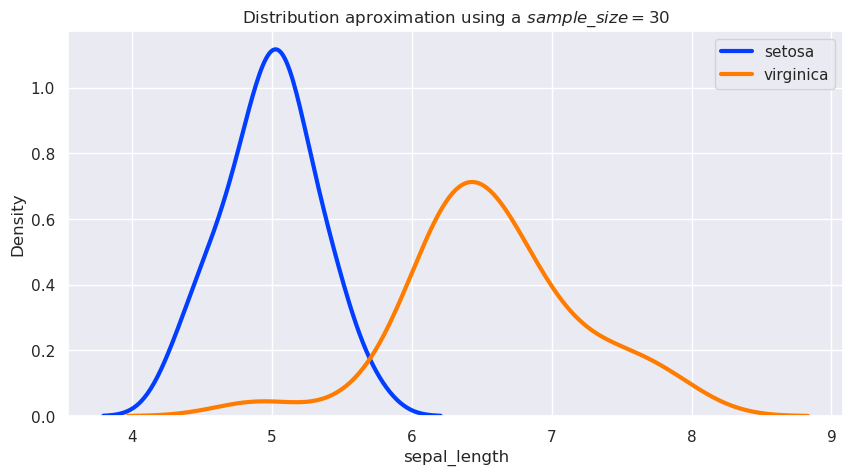

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(setosa_sample, label="setosa", linewidth=3)
sns.kdeplot(virginica_sample, label="virginica", linewidth=3)
plt.legend()
plt.title(f"Distribution aproximation using a $sample\_size={sample_size}$")
plt.show()

In [22]:
# Both samples seems normal and obviously the populations differs but, anyway let's do a t-test.
# First let's check if the variances are equal or not using F-test of two-tailed
# H0 = There are no differences between the variances var_1 = var_2 if p>0.05
# H1 = There is a difference between the variances var_1 != var_2   if p<0.05

def Ftest(sample1:"array-like", sample2:"array-like") -> (float, float):
    
    '''
    F-test of the variance
    
    This function does the two-tailed F-test to compare the variance between two populations with null
    hypotesis (H0) describing equal variances and alterntive hypotesis (H1) for unequal variances
    
    Paramaters
    ----------
    
    sample1: array-like
        Sample of the first population
        
    sample2: array-like
        Sample of the second population

    Return
    ------
        (float, float): F-statistic and p_value respectively
    
    Examples
    --------
    
    >>>import scipy.stats as stats
    >>>import numpy as np
    >>>sample_A = [1,2,3,4,5]
    >>>sample_B = [1,2,4,4,5]
    >>>Ftest(sample_A, sample_B)
    (1.08, 0.9423361401911694)
    '''
    
    # Variance of the samples
    sigma_1 = np.var(sample1, ddof=1)
    sigma_2 = np.var(sample2, ddof=1)
    
    numerator, denominator = (sigma_1, sigma_2) if sigma_1 > sigma_2 else (sigma_2, sigma_1)
    F = numerator / denominator

    p_value_one_tailed = 1 - stats.f.cdf(F, np.size(sample1) - 1, np.size(sample2) - 1)
    
    return F, p_value_one_tailed * 2

In [23]:
def ShowTypeVariances(p, alpha, statistic):
    
    print(f'{statistic[0]}: statistic = {statistic[1]}; p_value = {p}')
    
    if p < alpha:
        print("\tThe variances are not equal")
    else:
        print("\tThe variances are equal")

alpha = 0.05
F_statistic, p_value_F = Ftest(setosa_sample, virginica_sample)
ShowTypeVariances(p_value_F, alpha, ["F-test", F_statistic])

F-test: statistic = 3.391227706345914; p_value = 0.001539251598021929
	The variances are not equal


In [24]:
# We'll make also levene and barlett tests using the same alpha

levene_statistic, p_value_l  = stats.levene(setosa_sample, virginica_sample)

# Barlett is more sensitive to non-normal data. Only used if we are really confident that the
# data is normal
barlett_statistic, p_value_b = stats.bartlett(setosa_sample, virginica_sample)

ShowTypeVariances(p_value_l, alpha, ["Levene-test", levene_statistic])
ShowTypeVariances(p_value_b, alpha, ["Barlett-test", barlett_statistic])

Levene-test: statistic = 4.564968517458503; p_value = 0.0368626178547197
	The variances are not equal
Barlett-test: statistic = 10.027323487542784; p_value = 0.0015423499256511143
	The variances are not equal


In [25]:
# The variances are not equal as you already see, therefore;
# we will use an t-test for unequal variances (welch's test)
independet_ttest = stats.ttest_ind(setosa_sample, virginica_sample, equal_var=False)

if independet_ttest.pvalue < alpha:
    print("The means between setosa and virginica are statistically different (mu_1 != mu_2)")
else:
    print("The means between setosa and virginica are statistically equal (mu_1 = mu_2)")

The means between setosa and virginica are statistically different (mu_1 != mu_2)


An independent t-test for two species was done with unequal variances. However, using ```stats.ttest_rel``` we are able to run a paired-sample t-test and ```stats.ttest_1samp``` for one sample and by means of the parameter _alternative_ choose among two-tailed, right or left tail.

#### Z-test

Z-test is another parametric test to compare means between groups, more formally internet says "z-test is a statistical test to determine whether two population means are different when the sample size is large and the variances are known" As with a T-test to compare means, a Z-test has the same function but assumes that we do know the standard deviation about the population from which the sample came and that it follows a normal distribution. Similarly, a Z-test can be performed one-sample and for two independent samples, either two-tailed or one-tailed.

__Two-sample__

$$z = \frac{\overline{x_1}\ –\ \overline{x_2}}{ \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

$$\sigma_1;\sigma_2=population\ standard\ deviations$$
$$\overline{x_1};\overline{x_2}=sample\ means$$

__One-sample__

$$Z=\frac{(\overline{X}-\mu_{0})}{\sigma}$$

$$\overline{X}=mean\ of\ the\ sample$$
$$\mu_{0}=mean\ to\ compare$$
$$\sigma=population\ standard\ deviation$$

In addition, a Z-test can be applied for two proportions

$$Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})(  \frac{1}{n_1} + \frac{1}{n_2})}}$$

$$\hat{p}_1;\hat{p}_2 =proportions\ of\ samples$$
$$\hat{p}=mean\ of\ both\ samples$$


#### T-test vs Z-test

Both tests are used for comparison of means for normal data, but which one to use? Well, one may find that for sample sizes smaller than 30 a t-test seems to be used almost exclusively, while for those larger than that, a Z-test must be your choice regardless of whether or not the population standard deviation is known. This makes sense in light of the fact that a standard distribution T becomes more similar to the Z-distribution as the number of the sample size increases (central limit theorem) and the standard deviation of the population can be aproximated with the sample (that's the reason why in some notations of the Z-test you will find the formula using the difference of the means divided by the standard error of the sample instead of the standard deviation of the population, similar in the one-sample t-test does). However, strictly speaking some mention that if your sample size is larger than 30 and you do NOT know the variance or standard deviation of the population you would be making a mistake (not a big one actually) when using a Z-test, since you will get a slight error in the statistics obtained.

As mentioned earlier, the distribution curve changes with respect to the sample number, that is why a few degrees of freedom are defined for the t-test, which is not necessary for a Z distribution. The lower the degrees of freedom, a curve with wider tails is obtained, as the degrees tend to infinity, a Z-distribution will be obtained (with flatter tails).

Apparently the use of a Z-test when the sample size is greater than 30 has a historical connotation, not all statisticians had access to tables of p-value probabilities for all degrees of freedom, as opposed to a table for the Z distribution (again, where degrees of freedom are not necessary) and, since both are similar as the sample size increases, it was ok.

With that small reflection, nowadays we have programs with all those values calculated and therefore, in my personal understanding, independently of the sample size, if we do not know the standard deviation of the population we should NOT use a Z-test, but a t-test. But on the other hand, if these calculations are done manually, then it may be convenient to use a Z-test just for ease, with a minimal error that can sometimes be negligible.

In [26]:
## Let's calculate a Z-test of the following problem found on internet (from
# youtube channel statslectures)

# In the population, the average IQ is 100 with a standard deviation of 15. A team
# of scientists wants to test a new medication to see if it has either a positive or
# negative effect on intelligence, or no effect at all. A sample of 30 participants who
# have taken the medication has a mean of 140. Did the medication affect intelligence?

# Notes
# 1. This is a two-tailed problem because the exercise states for either a negative or positive effect,
#    not only for a positive effect (right tail) or only a negative effect (left tail)
# 2. This a one sample Z-test because we are comparing a sample versus a given value. We are not comparing
#    two samples or two populations
# 3. Let's set a confidence level of 95% or alpha of 0.05
#
# H0: There is no difference between the IQ mean of the participants (X_1 = 140) and the IQ of (X_2 = 100)
#      X_1 = X_2
# H1; There is a difference between the IQ mean of the participants (X_1 = 140) and the IQ of (X_2 = 100)
#       X_1 != X_2

std_population = 15
participants_mu = 100
mu_value = 140
alpha = 0.05

Z_statistic = (participants_mu - mu_value) / std_population
Z_distribution = stats.norm(loc=0, scale=1)

p_value_one_tail = Z_distribution.cdf(Z_statistic)
p_value_two_tail = p_value_one_tail * 2

if p_value_two_tail < alpha:
    print("The drug had an effect on the participants c: !")
else:
    print("The frug had no effect on the participants :c ")

print(f"p_value: {p_value_two_tail}")

The drug had an effect on the participants c: !
p_value: 0.007660761135179473


In [27]:
# On the other hand, here we have an interactive graphic representation of the
# Z-distribution (standard normal distribution) and t-distribution using
# different degrees of freedom. It's easier to plot using a data frame (no preview on github)

def t_distribution_standard(df, x):
    return stats.t.pdf(x=x, df=df, loc=0, scale=1)

# Range of values to retrieve density of Z-distribution and T-distribution
x_values = np.arange(-5, 5.025, 0.025)

# Normal data for plotting
normal_distribution_plot = stats.norm.pdf(x=x_values, loc=0, scale=1)

t_distributions = np.empty((x_values.shape[0], 3))
df_t_distributions = pd.DataFrame()

# Retrieving the density of t-distributions based on the degrees
for degree in range(1, 31):

    t_distributions[:,0] = degree
    t_distributions[:,1] = x_values.copy()
    t_distributions[:,2] = t_distribution_standard(degree, x_values)
    
    df_t_distributions = pd.concat([df_t_distributions, pd.DataFrame(t_distributions)])
    
df_t_distributions.rename({0:"Degree", 1:"Std", 2:"Density"}, inplace=True, axis=1)
df_t_distributions["Degree"] = df_t_distributions["Degree"].transform(int)

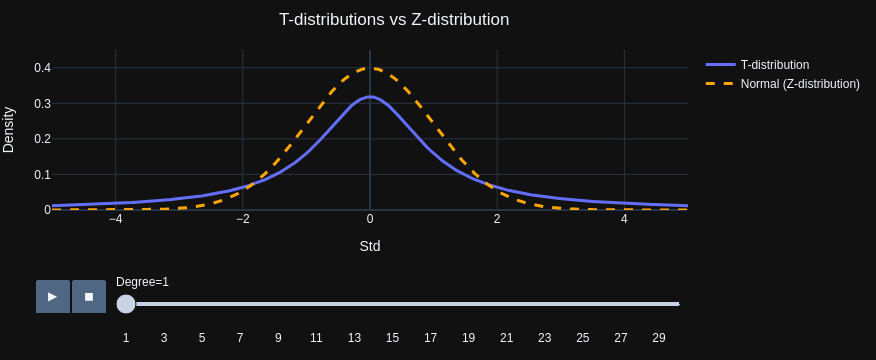

In [28]:
fig = px.line(df_t_distributions, x="Std", y="Density",
                 animation_frame="Degree", range_y=[0,0.45],
                 template="plotly_dark")

fig.update_traces(line=dict(width=3), name="T-distribution", showlegend=True)
fig.update_layout(title_text='T-distributions vs Z-distribution', title_x=0.45)

fig.add_scatter(x=x_values, y=normal_distribution_plot,
                line=dict(width=3,
                          color="orange",
                          dash="dash"),
                name="Normal (Z-distribution)",
                hovertemplate='Std=%{x}<br>Density=%{y}'
               )

fig.update_layout(
    margin=dict(l=30, r=150, t=50, b=10),
)


#fig["layout"].pop("updatemenus")
fig.show()

#### Anova

Before starting, a more detailed description of this statistical test can be found in [ANOVA análisis de varianza para comparar múltiples medias por
Joaquín Amat Rodrigo](https://www.cienciadedatos.net/documentos/19_anova#Tama%C3%B1o_del_efecto_(eta^2)) from which most of the following explanations/examples are derived.

In brief, Anova is a set of statistical tests used to compare the mean between two or more groups. Similar to a t-test, Anova introduces three main types of analysis.

* One-way Anova to compare the means between more than two groups with one factor and one response variable (e.g., the response to a (quantitative) drug to improve concentration at different ages [for children, adults or the elderly]).

* Anova for multiple factors and one response such as two-way, three-way etc. (e.g., response to a drug (quantitative) to improve concentration in different sexes [for male or female] of different ages [for children, adults, or elderly])

* Anova for dependent, paired or repeated data (e.g., response to a drug (quantitative) to improve concentration before and after the intake for different ages [for children, adults or elderly])

In general, those tests share some assumptions

* Independence: The observations must be random and the groups or factors independent of each other (assumption not valid for repeated data ANOVA).

* Homoscedasticity: The variance within groups should be approximately equal in all of them (assumption not valid for heterodastic ANOVA using Welch correction or Welch test).

* Normal distribution between groups

In turn, each of the above Anovas tests may have fewer or additional assumptions.

The statistic obtained by an Anova test is the $F_{ratio}$ which follows a "Fisher-Snedecor F" distribution and was developed under the null hypothesis that the mean between all the groups studied is the same or there is no difference, also denoted as $\mu_1 = \mu_2 = \mu_3 ...... = \mu_n$, on the contrary, the alternative hypothesis states that the mean of at least two groups differ significantly. Note, therefore, that an Anova test does not tell us which of these groups' means were different. For this purpose, post-hoc methods (methods after rejecting the null hypothesis) such as the Tukey-Kramer Honest Significant Difference (HSD) or paired t-test comparisons with corrections to avoid type I error inflation such as the Holm-Bonferroni Adjustment are used.

For the calculation of one-way ANOVA the intervariance and intravariance must be found. Those calculations are often decomposed into the calculation of Sum of Squares due to Treatment or (SSF) or sum of squares between the groups (SSB), Sum of Squares of Errors (SSE) or sum of squares within the groups (SSB) and Total Sum of Squares (TSS). Each calculated as:

| Source of variation |              Sum of Squares              | Degrees of Fredom |       Mean Squares       |            F           |
|:-------------------:|:----------------------------------------:|:-----------------:|:------------------------:|:----------------------:|
|    Between Groups   | $$SSB=\sum n_j(\bar{x}_j - \bar{x})^2$$  |  $$df_b = k - 1$$ |$$MSB = \frac{SSB}{df_b}$$| $$F = \frac{MSB}{MSE}$$|
|        Error        |    $$SSE = \sum \sum (x - \bar{x}_j)^2$$ |  $$df_e = N - k$$ |$$MSE = \frac{SSE}{df_e}$$|                        |
|        Total        |              $$SST = SSB + SSE$$         |  $$df_t = N - 1$$ |                          |                        |

Additionally, based on SSW and SSB, the mean squares (MS) are calculated and divided to obtain the F_{ratio}. The meaning of the variables is as follows:

$X=Values\ across\ each\ group$

$\bar{X}_j=Mean\ of\ each\ group$

$\bar{X}=Grand\ mean\ or\ general\ mean\ across\ all\ groups$

$k=Number\ of\ groups$

$n_j=Total\ observations\ across\ each\ group$

$N=Total\ observations\ across\ all\ groups$

Meanwhile, a statistic that accompanies an ANOVA test is the effect size. Several methods to calculate the effect size has been developed, one of them is denoted as $\eta^2$ and this is the value that allows measuring how much variance in the quantitative dependent variable is the result of the influence of the independent qualitative variable, or what is the same, how much the independent variable (factor) affects the dependent variable and is calculated as:

$$\eta^2 = \frac{SS_{effect}}{SS_{total}}$$

$$SS_{effect}= The\ sum\ of\ squares\ of\ an\ effect\ for\ one\ variable$$
$$SS_{total}= The\ total\ sum\ of\ squares\ in\ the\ ANOVA\ model$$

The most commonly used classification levels for effect size are:

$$0.01 = small$$
$$0.06 = medium$$
$$0.14 = large$$

##### One-way Anova in R

To run a one-way anova test in R we'll use the function ```aov```

In [29]:
%%R

library("tidyr")
library("lsr")      #etaSquared function
library("ggplot2")  
library("car")      #levene test, Anova

# Three different traffic routes are tested for mean driving time.
# Suposse we want to know if there is a difference among the average time
# in those routes

Route_1 <- c(30,32,27,35)
Route_2 <- c(27,29,28,36)
Route_3 <- c(16,41,22,31)

Values <- c(Route_1, Route_2, Route_3)
Routes <- rep(c("Route_1","Route_2","Route_3"), c(length(Route_1),length(Route_2),length(Route_3)))

data_routes <- data.frame(Values, Routes)

# Let's check for normality plotting and doing the shapiro-wilk test
# H0 = There is no difference between a normal curve and the data x if p>0.05
# H1 = There is a difference between a normal curve and the data x if p<0.05
by(data_routes, Routes, FUN = function(x){ shapiro.test(x$Values) } )

R[write to console]: Need help? Try Stackoverflow: https://stackoverflow.com/tags/ggplot2

R[write to console]: Loading required package: carData



Routes: Route_1

	Shapiro-Wilk normality test

data:  x$Values
W = 0.99994, p-value = 0.9999

------------------------------------------------------------ 
Routes: Route_2

	Shapiro-Wilk normality test

data:  x$Values
W = 0.80689, p-value = 0.1152

------------------------------------------------------------ 
Routes: Route_3

	Shapiro-Wilk normality test

data:  x$Values
W = 0.97729, p-value = 0.8859



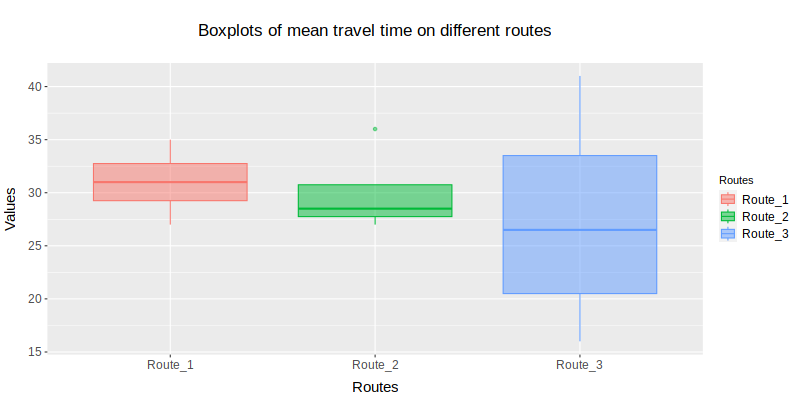

In [30]:
%%R --height=400 --width=800

# Boxplots
ggplot(data_routes, aes(x=Routes, y=Values)) + 
    geom_boxplot(aes(color=Routes, fill=Routes), alpha=0.5) + 
    ggtitle("\nBoxplots of mean travel time on different routes\n") + 
    
    # Resizing all text elements
    theme(plot.title = element_text(hjust = 0.5, size=17),
          axis.text = element_text(size=12), 
          axis.title = element_text(size=15),
          axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
          axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
          legend.text = element_text(size=12)
         )

According to the Shapiro-Wilk test, there is no difference among the routes and a normal curve; therefore, we can say the data follows a normal distribution. However, the boxplot points out an outlier for the second Route and this is probably the reason of the low p-value obtained for the shapiro-wilk test, we are not removing this to maintain balanced classes for the sake of this exercise.

Also the sizes of the boxes indicate a difference in the range of values obtained and this is going to be reflected in the variance (no homoscedasticity) among the groups. Let's found out by using a levene test.

In [31]:
%%R

# Using levene test for homogeneity by median and alpha=0.05
# H0: There are no differences among variances if p>0.05
# H1: THere are differences among variances if p<0.05
leveneTest(Values ~ Routes,data_routes, center = "median")

Levene's Test for Homogeneity of Variance (center = "median")
      Df F value  Pr(>F)  
group  2  3.7565 0.06514 .
       9                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Since the p_value > 0.05, we cannot reject the null hypothesis and the variances are equal, it means we don't need to adjust an ANOVA test for unequal variances. Nevertheless, we are almost at the limit to reject or not the null hypothesis and using a different metric as the mean and because we are including our outlier for the route_2, this could be a different story.

Now It's time to run the anova test for one way. The only factor we have is the variable Route, the data is normally distributed and also the variances are equal. To acomplish this, the one-way ANOVA of is done with ```aov``` function in R

In [32]:
%%R

# one-way Anova
# H0: Equal means among the groups mu_1 = mu_2 = mu_3 ... = mu_n if p_value>0.05
# H1: At least two groups have different means if p_value<0.05

one_way_anova <- aov(Values ~ Routes, data_routes)
one_way_summ <- summary(one_way_anova)
one_way_summ

            Df Sum Sq Mean Sq F value Pr(>F)
Routes       2     26      13   0.265  0.773
Residuals    9    441      49               


As you can see, we cannot reject the null hypothesis, so we conclude the means across all groups are the same. In this way, a post-hoc method is not necessary. 

On the other hand, lets calculate the $\eta^2$ using ```etaSquared``` from the _lsr_ package. We can also calculate it manually using the sum of squares

In [33]:
%%R
etaSquared(one_way_anova)

           eta.sq eta.sq.part
Routes 0.05567452  0.05567452


In [34]:
%%R
one_way_summ[[1]]["Sum Sq"][[1]][1] / sum(one_way_summ[[1]]["Sum Sq"])

[1] 0.05567452


We have an $\eta^2=0.055$, an effect size of about medium

##### Two-way Anova

The two-way Anova states a different null hypothesis that the one-way version does. The two-way ANOVA with replications combines 3 null hypotheses

* The means of the observations grouped by one factor are equal
* The means of the observations grouped by the other factor are equal
* There is no interaction between the two factors or the effect of one independent variable does not depend on the effect of the other independent variable

Two-way Anova is done by calling the function ```aov``` indicading the two categorical groups for an additive model "$+$" (handle the two variables independently) or an interaction effect model "$*$" (handle the two variables with a dependent relation)

In [35]:
%%R

# A building materials company wants to study the influence of thickness and type
# of tempering on the ultimate strength of steel sheets. For this purpose,
# they measure the stress to rupture (quantitative dependent variable) for two 
# types of tempering (slow and fast) and three sheet thicknesses (8 mm, 16 mm and 24 mm).

Strength <- c(15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
                 16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
                 13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
                 12.49, 13.55, 14.53)

Tempering <- c("Fast","Fast","Fast","Fast","Fast","Fast","Fast","Fast","Fast","Fast",
                "Fast","Fast","Fast","Fast","Fast","Slow","Slow","Slow","Slow","Slow",
                "Slow","Slow","Slow","Slow","Slow","Slow","Slow","Slow","Slow","Slow")

Thickness <-  c(8,8,8,8,8,16,16,16,16,16,24,24,24,24,24,8,8,8,8,8,16,16,16,16,16,24,24,24,24,24)

steel_sheets <- data.frame(Tempering, Thickness=as.factor(Thickness), Strength)
head.matrix(steel_sheets)

  Tempering Thickness Strength
1      Fast         8    15.29
2      Fast         8    15.89
3      Fast         8    16.02
4      Fast         8    16.56
5      Fast         8    15.46
6      Fast        16    16.91


In [36]:
%%R
# Class distributions
table(steel_sheets["Tempering"])

Tempering
Fast Slow 
  15   15 


In [37]:
%%R
# Class distributions
table(steel_sheets["Thickness"])

Thickness
 8 16 24 
10 10 10 


In [38]:
%%R
# Class distributions
table(steel_sheets[c("Tempering","Thickness")])

         Thickness
Tempering 8 16 24
     Fast 5  5  5
     Slow 5  5  5


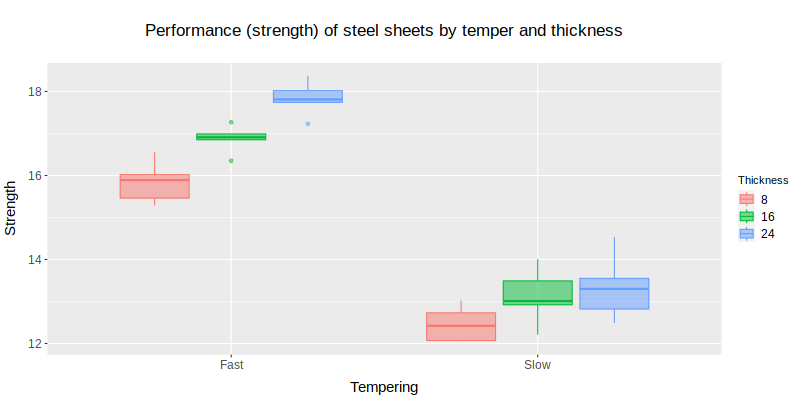

In [39]:
%%R --height=400 --width=800

# Boxplots
ggplot(steel_sheets, aes(x=Tempering, y=Strength, color=Thickness, fill=Thickness)) + 
    geom_boxplot(alpha=0.5) + 
    ggtitle("\nPerformance (strength) of steel sheets by temper and thickness\n") + 
    
    # Resizing all text elements
    theme(plot.title = element_text(hjust = 0.5, size=17),
          axis.text = element_text(size=12), 
          axis.title = element_text(size=15),
          axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
          axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
          legend.text = element_text(size=12)
         )

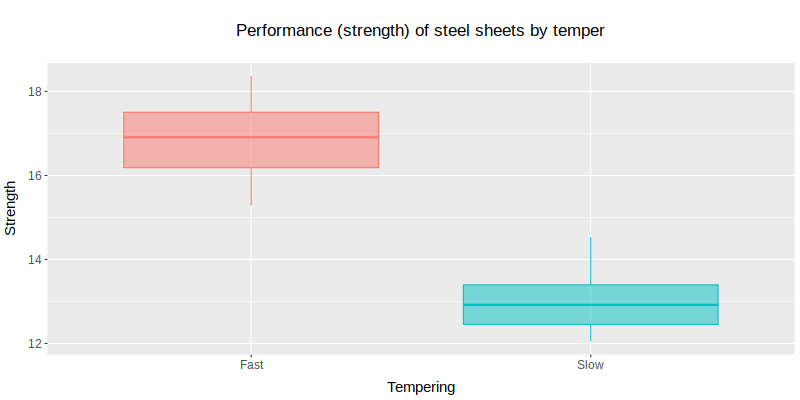

In [40]:
%%R --height=400 --width=800

# Boxplots
ggplot(steel_sheets, aes(x=Tempering, y=Strength, color=Tempering, fill=Tempering)) + 
    geom_boxplot(alpha=0.5, show.legend = FALSE) + 
    ggtitle("\nPerformance (strength) of steel sheets by temper\n") + 
    
    # Resizing all text elements
    theme(plot.title = element_text(hjust = 0.5, size=17),
          axis.text = element_text(size=12), 
          axis.title = element_text(size=15),
          axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
          axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
         )

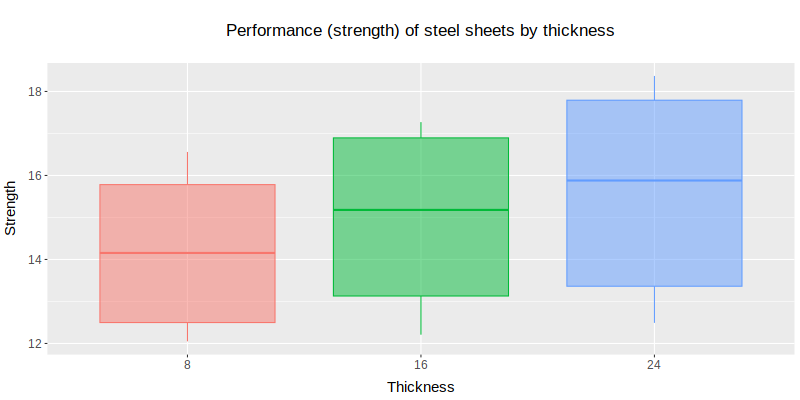

In [41]:
%%R --height=400 --width=800

# Boxplots
ggplot(steel_sheets, aes(x=Thickness, y=Strength, color=Thickness, fill=Thickness)) + 
    geom_boxplot(alpha=0.5, show.legend = FALSE) + 
    ggtitle("\nPerformance (strength) of steel sheets by thickness\n") + 
    
    # Resizing all text elements
    theme(plot.title = element_text(hjust = 0.5, size=17),
          axis.text = element_text(size=12), 
          axis.title = element_text(size=15),
          axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
          axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
         )

In [42]:
%%R
# Let's do the anova test for an interactive model (sign * in formula)
# We'll check normality later using the Residuals. It's easier than trying 
# a shapiro test directly. The residuals should follow a normal distribution

# Formula to use in both anova and levene
fml <- as.formula("Strength ~ Tempering * Thickness")
leveneTest(fml, steel_sheets)

Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  5  0.6939 0.6331
      24               


In [43]:
%%R
anova_two_way <- aov(fml, steel_sheets)
summary(anova_two_way)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
Tempering            1 112.68  112.68 380.082 3.19e-16 ***
Thickness            2  10.41    5.21  17.563 2.00e-05 ***
Tempering:Thickness  2   1.60    0.80   2.705   0.0873 .  
Residuals           24   7.11    0.30                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [44]:
%%R
etaSquared(anova_two_way)

                        eta.sq eta.sq.part
Tempering           0.85485219   0.9406061
Thickness           0.07900327   0.5940887
Tempering:Thickness 0.01216553   0.1839235


The analysis of variance confirms that there is a significant influence on sheet strength by both Tempering and Thickness with large (0.85) and medium (0.079) $\eta^2$ effect sizes respectively, meaning at least two groups there had different means. In addition, no significant interaction between them was found (Tempering:Thickness with p_value = 0.0873 using an $\alpha=0.05$), wich means we only need to check for normality for the results to be valid.

In [45]:
%%R
resid <- residuals(anova_two_way)
shapiro.test(resid)


	Shapiro-Wilk normality test

data:  resid
W = 0.98397, p-value = 0.9185



Finally to end this section, Which groups are the ones that differ in their mean? Let's run a Tukey-Kramer Honest Significant Difference (HSD) test and a paired t-test with the Holm-Bonferroni Adjustment (this one only for combinations of Tempering and Thickness, but not both)

In [46]:
%%R
anova_two_way_tukey <- TukeyHSD(anova_two_way)
anova_two_way_tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fml, data = steel_sheets)

$Tempering
            diff      lwr      upr p adj
Slow-Fast -3.876 -4.28633 -3.46567     0

$Thickness
       diff         lwr      upr     p adj
16-8  0.850  0.24192212 1.458078 0.0051615
24-8  1.435  0.82692212 2.043078 0.0000129
24-16 0.585 -0.02307788 1.193078 0.0609253

$`Tempering:Thickness`
                  diff         lwr      upr     p adj
Slow:8-Fast:8   -3.386 -4.45072028 -2.32128 0.0000000
Fast:16-Fast:8   1.030 -0.03472028  2.09472 0.0619831
Slow:16-Fast:8  -2.716 -3.78072028 -1.65128 0.0000006
Fast:24-Fast:8   1.990  0.92527972  3.05472 0.0000783
Slow:24-Fast:8  -2.506 -3.57072028 -1.44128 0.0000022
Fast:16-Slow:8   4.416  3.35127972  5.48072 0.0000000
Slow:16-Slow:8   0.670 -0.39472028  1.73472 0.4006117
Fast:24-Slow:8   5.376  4.31127972  6.44072 0.0000000
Slow:24-Slow:8   0.880 -0.18472028  1.94472 0.1477400
Slow:16-Fast:16 -3.746 -4.81072028 -2

In [47]:
%%R
pairwise.t.test(x = steel_sheets$Strength, g = steel_sheets$Thickness,
                p.adjust.method = "holm", paired = TRUE, alternative = "two.sided")


	Pairwise comparisons using paired t tests 

data:  steel_sheets$Strength and steel_sheets$Thickness 

   8      16    
16 0.0082 -     
24 0.0036 0.0164

P value adjustment method: holm 


In [48]:
%%R
pairwise.t.test(x = steel_sheets$Strength, g = steel_sheets$Tempering,
                p.adjust.method = "holm", paired = TRUE, alternative = "two.sided")


	Pairwise comparisons using paired t tests 

data:  steel_sheets$Strength and steel_sheets$Tempering 

     Fast   
Slow 2.3e-11

P value adjustment method: holm 


<br/>

In conclusion, there is evidence to say that a significant interaction between our factors (tempering and thickness) was not found, as shown by a $p\_value > 0.05$ ($p=0.0873$) in the two-way ANOVA test. Additionally, significant differences in the average performance of steel sheets due to both thickness ($p=3.19e-16$) and temper ($p=2.00e-05$) were found in at least two groups. Specifically, according to both the Tukey-Kramer Honest Significant Difference (HSD) test and a paired t-test using the Holm-Bonferroni Adjustment. The differed means of the factors are as follows:

**Tempering (Tukey)**
* Slow:Fast with $p \approx 0$

**Tempering (paired t-test)**
* Slow:Fast with $p = 2.3e-11$

**Thickness (Tukey)**
* 16:8 with $p=0.0051615$
* 24:8 with $p=0.0000129$

**Thickness (paired t-tes)**
* 16:8 with $p=0.0082$
* 24:8 with $p=0.0036$

However, according to the paired t-test, between the 24:16 thicknesses the means did differ with $p=0.0164$ as compared to Tukey with a value of $p=0.0609253$.

In adittion, the effect of the factors on sheet strength according to $\eta^2$ is large ($\eta^2=0.85$) and medium ($\eta^2=0.079$) for tempering and thickness, respectively. The validation about normality was done using the Shapiro-Wilk test for residuals ($p = 0.9185$) and Levene's Test for Homogeneity of Variance ($p=0.6331$).            

##### Paired Anova

The only condition (besides the already described) to run a paired Anova is Sphericity.

Sphericity is the condition where the variances of the differences between all combinations of related groups (levels) are equal. For instance, if there are tree levels A,B,C and the variances of the differences are var(A-B) = var(A-C) = var(B-C), we can say there is sphericity. This assumption can be explored by using Mauchly's test of which the null hypothesis states there is sphericity. Otherwise, two types of adjustments can be done to run a paired ANOVA test, those are the Greenhouse-Geisser adjustment and the Huynh-Feldt adjustment. A third option is to look at for the non-parametric test of Friedman.

In this case, the ```Anova``` function from the _car_ package is more suitable than ```aov```. ```Anova``` check for sphericity and if this assumption is violated, it'will make the Greenhouse-Geisser adjustment and the Huynh-Feldt adjustment.

Finally, this test can be ran using multiples factors or independent variables

In [55]:
%%R

# Quick example of paired test in R. More details found somewhere else

# Data section
products <- c("lettuce", "potatoes", "milk", "eggs", "bread", "cereal", "ground.beef",
              "tomato.soup", "laundry.detergent", "aspirin")

store_A <- c(1.755, 2.655, 2.235, 0.975, 2.370, 4.695, 3.135, 0.930, 8.235, 6.690)
store_B <- c(1.78, 1.98, 1.69, 0.99, 1.70, 3.15, 1.88, 0.65, 5.99, 4.84)
store_C <- c(1.29, 1.99, 1.79, 0.69, 1.89, 2.99, 2.09, 0.65, 5.99, 4.99)
store_D <- c(1.29, 1.99, 1.59, 1.09, 1.89, 3.09, 2.49, 0.69, 6.99, 5.15)

store_data <- data.frame(products, store_A, store_B, store_C, store_D)
store_data_pivot <- gather(data = store_data, key = "store", value = "price", 2:5)
store_data

            products store_A store_B store_C store_D
1            lettuce   1.755    1.78    1.29    1.29
2           potatoes   2.655    1.98    1.99    1.99
3               milk   2.235    1.69    1.79    1.59
4               eggs   0.975    0.99    0.69    1.09
5              bread   2.370    1.70    1.89    1.89
6             cereal   4.695    3.15    2.99    3.09
7        ground.beef   3.135    1.88    2.09    2.49
8        tomato.soup   0.930    0.65    0.65    0.69
9  laundry.detergent   8.235    5.99    5.99    6.99
10           aspirin   6.690    4.84    4.99    5.15


In [57]:
%%R
head(store_data_pivot)

  products   store price
1  lettuce store_A 1.755
2 potatoes store_A 2.655
3     milk store_A 2.235
4     eggs store_A 0.975
5    bread store_A 2.370
6   cereal store_A 4.695


In [73]:
%%R

# Formula and test section
df <- as.matrix(store_data[-1])
model_lm <- lm(df ~ 1)
levels <- factor(c("store_A", "store_B", "store_C", "store_D"))
anova_paired <- Anova(model_lm, idata = data.frame(levels),
                       idesign = ~ levels, type = "III")

summary(anova_paired, multivariate = F)


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

             Sum Sq num Df Error SS den Df F value    Pr(>F)    
(Intercept) 296.725      1  139.479      9  19.146  0.001782 ** 
levels        5.737      3    3.964     27  13.025 1.898e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Mauchly Tests for Sphericity

       Test statistic   p-value
levels        0.12901 0.0078973


Greenhouse-Geisser and Huynh-Feldt Corrections
 for Departure from Sphericity

        GG eps Pr(>F[GG])   
levels 0.46824   0.001747 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          HF eps Pr(>F[HF])
levels 0.5287146 0.00103603


In [58]:
%%R
# Post-hoc section
pairwise.t.test(x = store_data_pivot$price, g = store_data_pivot$store,
                p.adjust.method = "holm", paired = TRUE, alternative = "two.sided")


	Pairwise comparisons using paired t tests 

data:  store_data_pivot$price and store_data_pivot$store 

        store_A store_B store_C
store_B 0.022   -       -      
store_C 0.014   0.695   -      
store_D 0.014   0.491   0.331  

P value adjustment method: holm 


##### Sum of suares type I,II and III

In the set of ANOVA tests there are 3 types of ways to calculate the sums of squares ($SS$), if the data is balanced, which means for all the factors the sample size is the same, any of the 3 methods used will result in the same value, otherwise, if the data is not balanced, the order of the factors at the moment of the maths will display different results. In this respect, each method is called type I,II and III and differs in the amount of variation it assigns to each factor.

* **Type I**

Type I is also called sequantial sums of squares. It assigns variation in order sequantial, therefore; between two independet variables A and B (two-way Anova), the maximun variation ends at A, the remaining at B and between the interaction AB in this order. 

This type of sums of square is biased (and the $F\_ratio$ and $p$) into the first variable called. **It's suggested the use of type I only when you have a strong feeling about the relevance of one variable over the others**. Mathematically, type I is defined as follow:

1. $SS(A)$ for independent variable A
2. $SS(B | A)$ for independent variable B
3. $SS(AB | B,A)$ for the interaction effect

* **Type II**

In this sums of squres, the variation assigned to the independent variable A is explaining B, and conversely, the variation assigned to B is explaining A. Thus, the order doesn't really matter. Also, type II sums of squares do not take into account an interaction effect. **It's suggested the use of type II when you are NOT expecting an interaction between A and B. Type II is more powerful than type III*

1. $SS(A | B)$ for independent variable A
2. $SS(B | A)$ for independent variable B

* **Type III**

Similar to Type II, the order doesn't matter in Type III. Type III take into account the variation of the other variable plus the interaction between them. **It's suggested the use of type II when you are expecting an interaction between A and B.*

1. $SS(A | B, AB)$ for independent variable A
2. $SS(B | A, AB)$ for independent variable B

Functions such as ```aov``` calculate the ANOVA test using the sum of squares of Type I. ```Anova```, on the other hand, allows the the Type II and III.

A more in deep explanation about this topic can be found on [ANOVA’s three types of estimating Sums of Squares: don’t make the wrong choice!](https://towardsdatascience.com/anovas-three-types-of-estimating-sums-of-squares-don-t-make-the-wrong-choice-91107c77a27a) or [Anova – Type I/II/III SS explained](https://www.r-bloggers.com/2011/03/anova-%E2%80%93-type-iiiiii-ss-explained/)

#### Manova

Manova is an extention of Anova allowing multiples dependent variables. 

#### Ancova

#### Mancova

### Non-parametric

In [ ]:
end = time()
print(f"This notebook ran in {end - start} secs")